<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Plot-TICs" data-toc-modified-id="Plot-TICs-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Plot TICs</a></span></li><li><span><a href="#VDE" data-toc-modified-id="VDE-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>VDE</a></span></li><li><span><a href="#Plumed-output" data-toc-modified-id="Plumed-output-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Plumed output</a></span></li><li><span><a href="#Testing-with-Hyper-parameters" data-toc-modified-id="Testing-with-Hyper-parameters-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Testing with Hyper-parameters</a></span><ul class="toc-item"><li><span><a href="#Hidden-layer-2" data-toc-modified-id="Hidden-layer-2-0.4.1"><span class="toc-item-num">0.4.1&nbsp;&nbsp;</span>Hidden layer 2</a></span></li><li><span><a href="#Plumed-driver" data-toc-modified-id="Plumed-driver-0.4.2"><span class="toc-item-num">0.4.2&nbsp;&nbsp;</span>Plumed driver</a></span></li><li><span><a href="#GNUPLOT" data-toc-modified-id="GNUPLOT-0.4.3"><span class="toc-item-num">0.4.3&nbsp;&nbsp;</span>GNUPLOT</a></span></li></ul></li><li><span><a href="#Plotting-layers" data-toc-modified-id="Plotting-layers-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Plotting layers</a></span><ul class="toc-item"><li><span><a href="#Layer-1" data-toc-modified-id="Layer-1-0.5.1"><span class="toc-item-num">0.5.1&nbsp;&nbsp;</span>Layer 1</a></span></li><li><span><a href="#Layer-2" data-toc-modified-id="Layer-2-0.5.2"><span class="toc-item-num">0.5.2&nbsp;&nbsp;</span>Layer 2</a></span></li><li><span><a href="#Layer-3" data-toc-modified-id="Layer-3-0.5.3"><span class="toc-item-num">0.5.3&nbsp;&nbsp;</span>Layer 3</a></span></li><li><span><a href="#Layer-4" data-toc-modified-id="Layer-4-0.5.4"><span class="toc-item-num">0.5.4&nbsp;&nbsp;</span>Layer 4</a></span></li><li><span><a href="#Hidden-layer-3" data-toc-modified-id="Hidden-layer-3-0.5.5"><span class="toc-item-num">0.5.5&nbsp;&nbsp;</span>Hidden layer 3</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np

import mdtraj as md
from mdtraj.geometry import compute_distances, compute_angles

import os,sys,shutil
import re

from msmbuilder.cluster import *
from msmbuilder.msm import *
from msmbuilder.dataset import dataset
from msmbuilder.featurizer import *
from msmbuilder import utils
from msmbuilder.decomposition import tICA, PCA
from msmbuilder.lumping import *
from msmbuilder.tpt import mfpts
from msmbuilder import hmm

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Ellipse
#plot graphs inline, e.g. don't need plot.show()
%matplotlib inline

from sklearn.utils import check_random_state
from sklearn import mixture
from itertools import product, chain

/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import warnings
import msmexplorer as msme
warnings.filterwarnings('ignore')
import seaborn as sns
%pylab inline
import numpy as np
import os 
import pandas as pd
import mdtraj as md 
sns.set_style("whitegrid")
sns.set_context("talk",1.3)
from msmbuilder.utils import load,dump

Populating the interactive namespace from numpy and matplotlib


/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [3]:
tica_mdl =load("tica_mdl_flapchi1angle.pkl")
tica_features = load("tica_data.pkl")

In [11]:
tica_mdl

tICA(commute_mapping=False, kinetic_mapping=True, lag_time=10, n_components=5,
     shrinkage=None)

In [4]:
df = pd.read_pickle("feature_descriptor.pkl")

In [16]:
df

,atominds,featuregroup,featurizer,otherinfo,resids,resnames,resseqs
0,"[0, 2, 4, 7]",chi1,Dihedral,sin,[73],[LYS],[74]
1,"[22, 24, 26, 28]",chi1,Dihedral,sin,[74],[VAL],[75]
2,"[38, 40, 42, 45]",chi1,Dihedral,sin,[75],[GLU],[76]
3,"[53, 55, 57, 60]",chi1,Dihedral,sin,[76],[MET],[77]
4,"[70, 72, 74, 77]",chi1,Dihedral,sin,[77],[ASN],[78]
5,"[84, 86, 88, 91]",chi1,Dihedral,sin,[78],[TYR],[79]
6,"[105, 107, 109, 111]",chi1,Dihedral,sin,[79],[VAL],[80]
7,"[121, 123, 125, 128]",chi1,Dihedral,sin,[80],[SER],[81]
8,"[139, 141, 143, 149]",chi1,Dihedral,sin,[82],[THR],[83]
9,"[153, 155, 157, 159]",chi1,Dihedral,sin,[83],[VAL],[84]


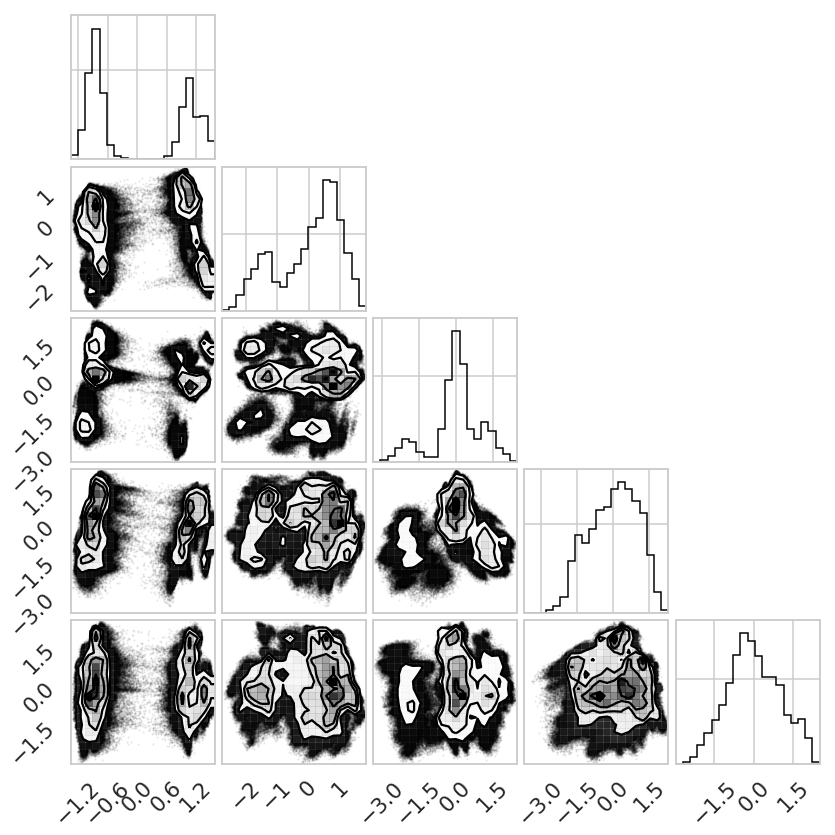

In [14]:
%matplotlib inline
import msmexplorer as msme
import numpy as np
txx = np.concatenate(tica_features)
_ = msme.plot_histogram(txx)

Text(0.5, 0, 'TICs (zero indexed)')

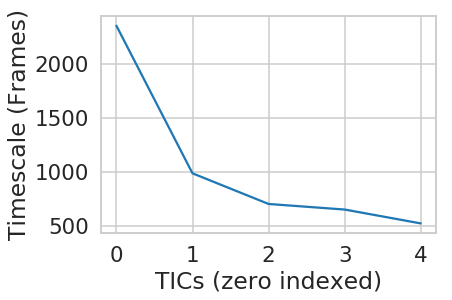

In [8]:
import matplotlib as plt
plot(tica_mdl.timescales_)
ylabel('Timescale (Frames)')
xlabel('TICs (zero indexed)')

## Plot TICs

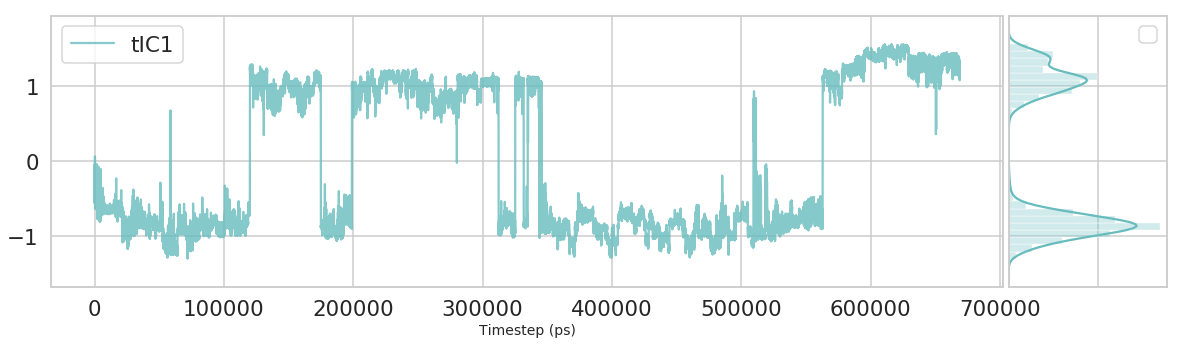

In [5]:
ax, side_ax = msme.plot_trace(tica_features[0][:, 0], window=10,
                              label='tIC1', xlabel='Timestep (ps)')

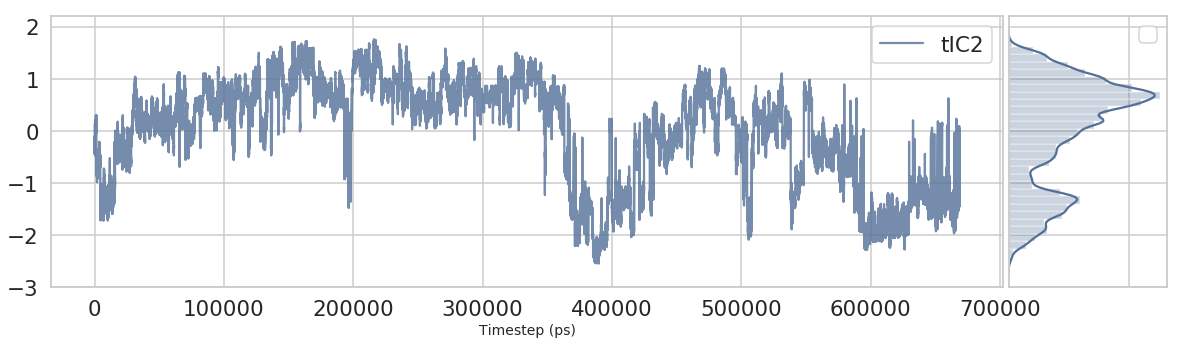

In [6]:
ax, side_ax = msme.plot_trace(tica_features[0][:, 1], window=10,
                              label='tIC2', color='rawdenim', xlabel='Timestep (ps)')

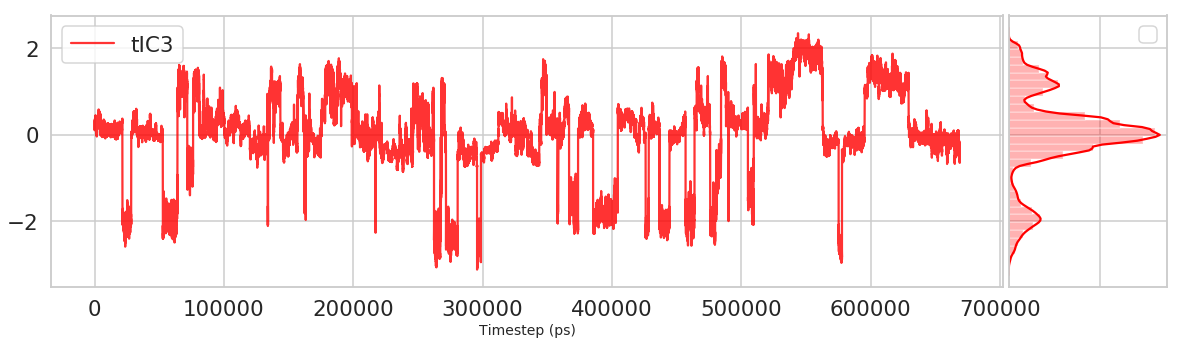

In [7]:
ax, side_ax = msme.plot_trace(tica_features[0][:, 2], window=10,
                              label='tIC3', color='red', xlabel='Timestep (ps)')

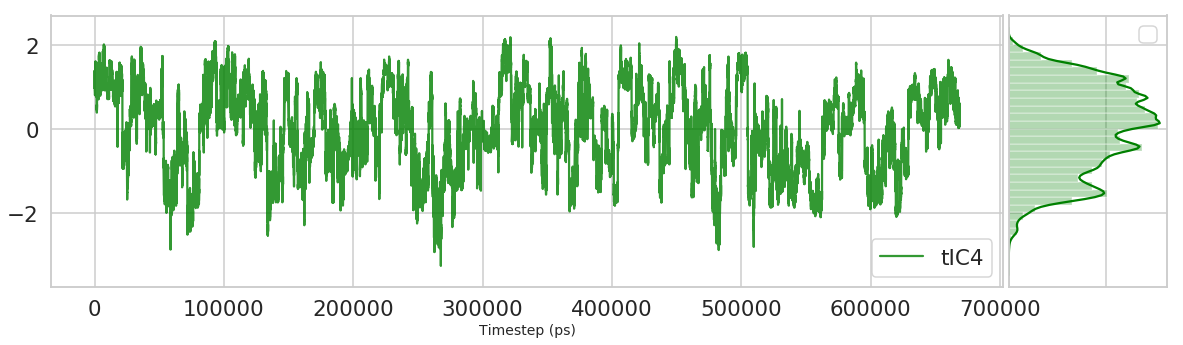

In [9]:
ax, side_ax = msme.plot_trace(tica_features[0][:, 3], window=10,
                              label='tIC4', color='green', xlabel='Timestep (ps)')

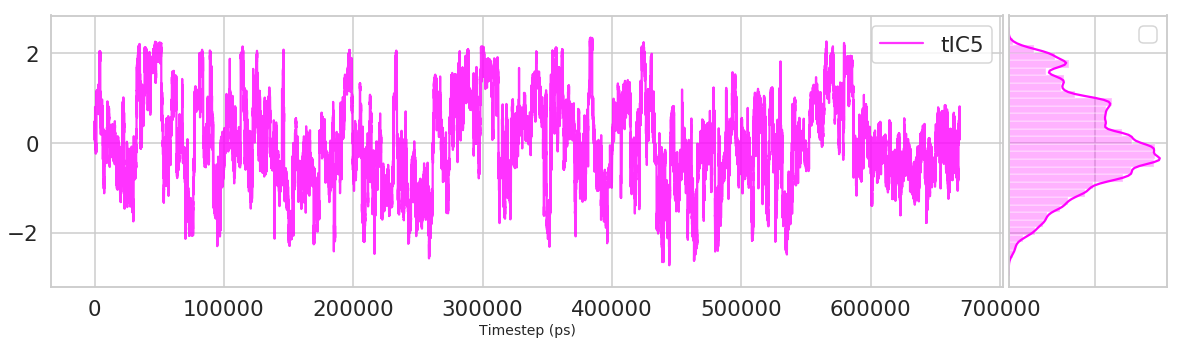

In [10]:
ax, side_ax = msme.plot_trace(tica_features[0][:, 4], window=10,
                              label='tIC5', color='magenta', xlabel='Timestep (ps)')

## VDE

In [11]:
import torch
from vde import VDE

** 5 is the number of inputs in this case number of TICs**

In [10]:
model = VDE(5,lag_time=10,hidden_layer_depth=2,hidden_size=20,n_epochs=100,batch_size=500,learning_rate=1e-2)
model.dtype = torch.DoubleTensor
model.use_cuda =False
model.cpu()
model.double()
model.fit(tica_features)
torch.save(model,"trained_chi.pkl")

Epoch: 0
Batch 100, loss = 1.0100
rec_loss = 1.0086, autocorr_loss = 0.0014
Epoch: 1
Batch 100, loss = 0.9751
rec_loss = 0.9727, autocorr_loss = 0.0025
Epoch: 2
Batch 100, loss = 0.6250
rec_loss = 0.6212, autocorr_loss = 0.0038
Epoch: 3
Batch 100, loss = 0.4899
rec_loss = 0.4888, autocorr_loss = 0.0011
Epoch: 4
Batch 100, loss = 0.4437
rec_loss = 0.4420, autocorr_loss = 0.0017
Epoch: 5
Batch 100, loss = 0.3771
rec_loss = 0.3760, autocorr_loss = 0.0011
Epoch: 6
Batch 100, loss = 0.3315
rec_loss = 0.3299, autocorr_loss = 0.0017
Epoch: 7
Batch 100, loss = 0.3041
rec_loss = 0.3033, autocorr_loss = 0.0008
Epoch: 8
Batch 100, loss = 0.3031
rec_loss = 0.3018, autocorr_loss = 0.0013
Epoch: 9
Batch 100, loss = 0.2973
rec_loss = 0.2956, autocorr_loss = 0.0017
Epoch: 10
Batch 100, loss = 0.2633
rec_loss = 0.2620, autocorr_loss = 0.0013
Epoch: 11
Batch 100, loss = 0.2341
rec_loss = 0.2326, autocorr_loss = 0.0015
Epoch: 12
Batch 100, loss = 0.2261
rec_loss = 0.2233, autocorr_loss = 0.0029
Epoch: 13

In [11]:
model = torch.load("trained_chi.pkl")

In [15]:
from torch.autograd import Variable

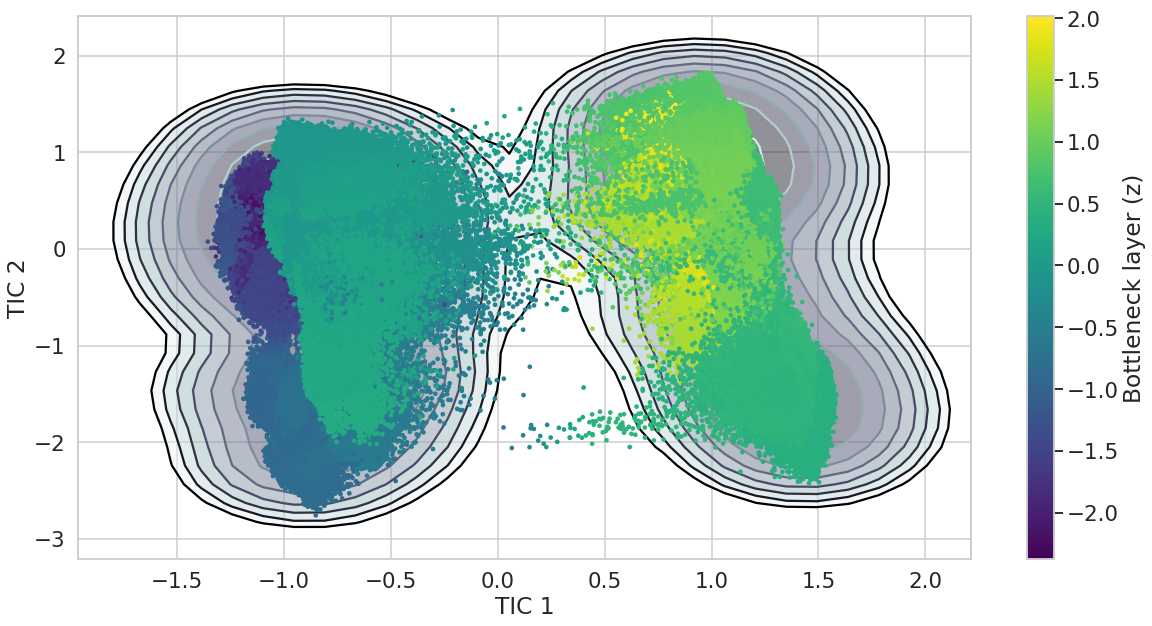

In [15]:
plt.rcParams["figure.figsize"] = (20,10)
model.eval()
X=Variable(torch.from_numpy(txx[:,:model.input_size]).type(model.dtype))
output = model.encoder.output_layer(model.encoder.hidden_network(model.encoder.input_layer(X))).cpu().data.numpy()
msme.plot_free_energy(txx, obs=(0, 1), n_samples=10000)
p=scatter(txx[:,0],txx[:,1],c=np.squeeze(output),cmap='viridis', s=10)
xlabel("TIC 1")
ylabel("TIC 2")
cb=colorbar(p,orientation="vertical")
cb.set_label("Bottleneck layer (z)")

## Plumed output

In [10]:
from vde_metadynamics.render_tics import *
from vde_metadynamics.render_df import *
from vde_metadynamics.render_network import *

In [17]:
all_output = []
all_out=[]
all_out.append("RESTART\n")
# Lets only calculate the contacts that are actually needed by the tica calculation/neural network 
inds = np.unique(np.nonzero(tica_mdl.components_[:5, :])[1])
all_out.extend(render_df(df=df, inds=inds, tica_mdl=tica_mdl))
# We only need the first 5 tics
for i in range(5):
    all_out.extend(render_tic(tica_mdl=tica_mdl, tic_index=i, output_label_prefix="l0"))
# Convert the VDE model into something Plumed can understand
all_out.extend(render_network(model))

ValueError: Sorry but kinetic mapping or is not supported for now

In [ ]:
print("".join(all_out))

## Testing with Hyper-parameters

### Hidden layer 2

In [19]:
df = pd.read_pickle("/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/feature_descriptor.pkl")

In [20]:
df

,atominds,featuregroup,featurizer,otherinfo,resids,resnames,resseqs
0,"[0, 2, 4, 6]",chi1,Dihedral,sin,[74],[VAL],[75]
1,"[16, 18, 20, 23]",chi1,Dihedral,sin,[75],[GLU],[76]
2,"[31, 33, 35, 38]",chi1,Dihedral,sin,[76],[MET],[77]
3,"[48, 50, 52, 55]",chi1,Dihedral,sin,[77],[ASN],[78]
4,"[62, 64, 66, 69]",chi1,Dihedral,sin,[78],[TYR],[79]
5,"[83, 85, 87, 89]",chi1,Dihedral,sin,[79],[VAL],[80]
6,"[99, 101, 103, 106]",chi1,Dihedral,sin,[80],[SER],[81]
7,"[117, 119, 121, 127]",chi1,Dihedral,sin,[82],[THR],[83]
8,"[131, 133, 135, 137]",chi1,Dihedral,sin,[83],[VAL],[84]
9,"[147, 149, 151, 154]",chi1,Dihedral,sin,[84],[SER],[85]


In [13]:
tica_mdl =load("/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/tica_mdl_flapchi1angle.pkl")
tica_features = load("/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/tica_data.pkl")

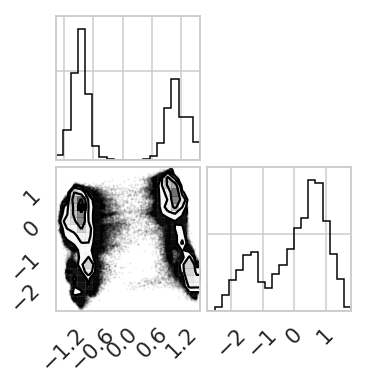

In [14]:
%matplotlib inline
import msmexplorer as msme
import numpy as np
txx = np.concatenate(tica_features)
_ = msme.plot_histogram(txx)

In [12]:
model = torch.load("/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/trained_chilag10h2.pkl")

In [18]:
model

VDE(input_size=2, encoder_size=1, n_epochs=100,
    batch_size=500, lag_time=10, sliding_window=False,
    autocorr=True, cuda=False)

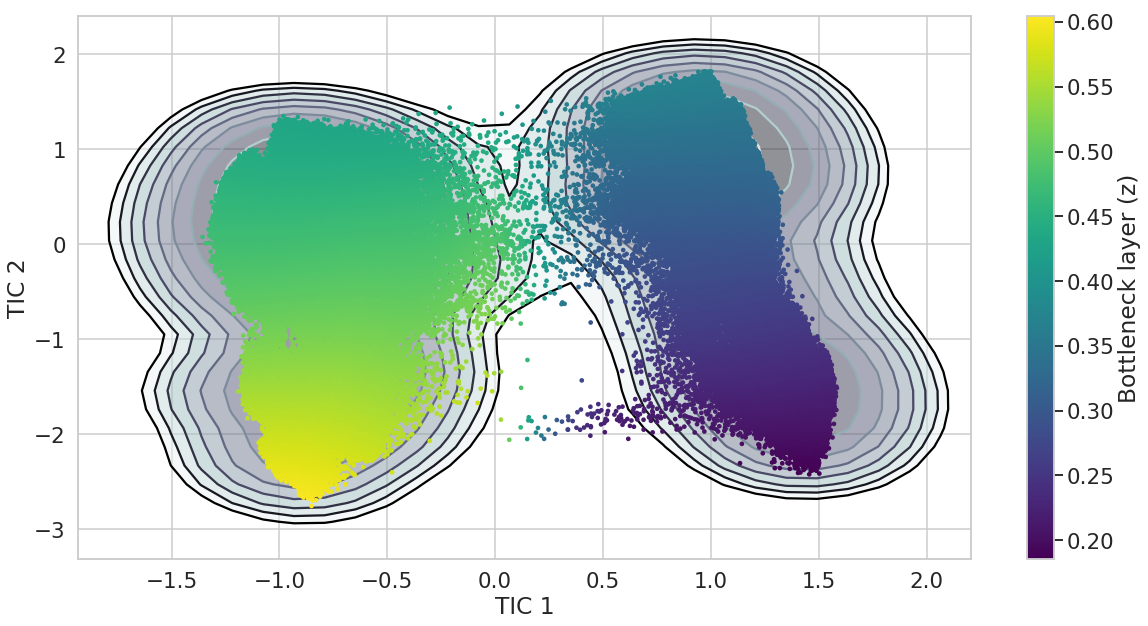

In [9]:
plt.rcParams["figure.figsize"] = (20,10)
model.eval()
X=Variable(torch.from_numpy(txx[:,:model.input_size]).type(model.dtype))
output = model.encoder.output_layer(model.encoder.hidden_network(model.encoder.input_layer(X))).cpu().data.numpy()
msme.plot_free_energy(txx, obs=(0, 1), n_samples=10000)
p=scatter(txx[:,0],txx[:,1],c=np.squeeze(output),cmap='viridis', s=10)
xlabel("TIC 1")
ylabel("TIC 2")
cb=colorbar(p,orientation="vertical")
cb.set_label("Bottleneck layer (z)")

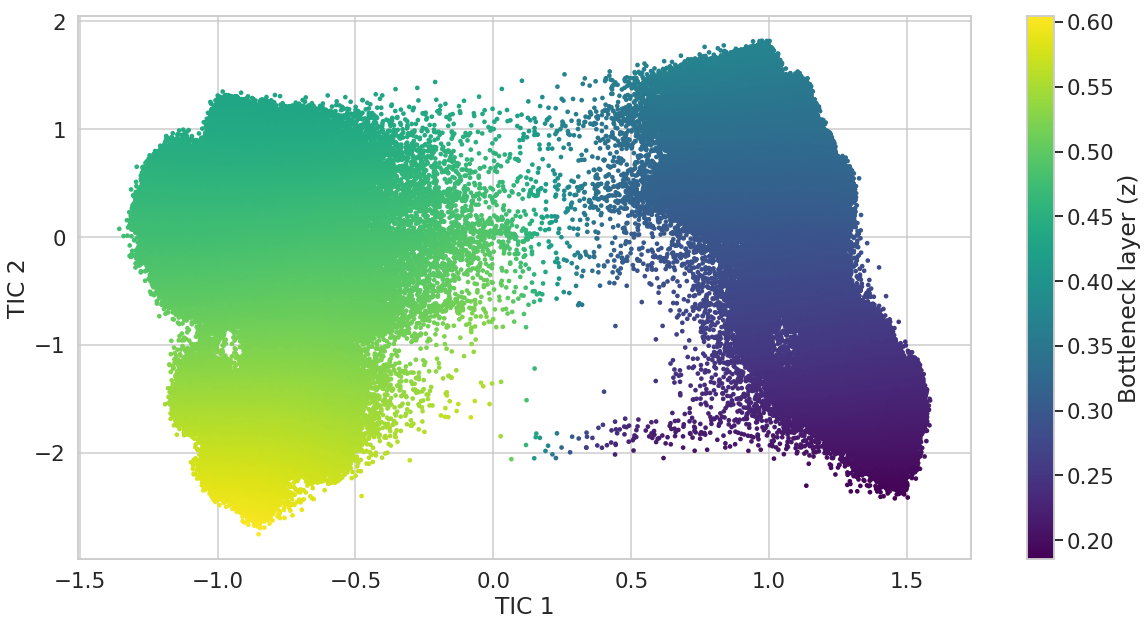

In [17]:
plt.rcParams["figure.figsize"] = (20,10)
model.eval()
X=Variable(torch.from_numpy(txx[:,:model.input_size]).type(model.dtype))
output = model.encoder.output_layer(model.encoder.hidden_network(model.encoder.input_layer(X))).cpu().data.numpy()
p=scatter(txx[:,0],txx[:,1],c=np.squeeze(output),cmap='viridis', s=10)
xlabel("TIC 1")
ylabel("TIC 2")
cb=colorbar(p,orientation="vertical")
cb.set_label("Bottleneck layer (z)")

### Plumed driver

In [23]:
all_output = []
all_out=[]
all_out.append("RESTART\n")
# Lets only calculate the contacts that are actually needed by the tica calculation/neural network 
inds = np.unique(np.nonzero(tica_mdl.components_[:2, :])[1])
all_out.extend(render_df(df=df, inds=inds, tica_mdl=tica_mdl))
# We only need the first 5 tics
for i in range(2):
    all_out.extend(render_tic(tica_mdl=tica_mdl, tic_index=i, output_label_prefix="l0"))
# Convert the VDE model into something Plumed can understand
all_out.extend(render_network(model))

2
Linear(in_features=20, out_features=20, bias=True) 3
3
Swish(
  (sigmoid): Sigmoid()
) 4
4
Linear(in_features=20, out_features=20, bias=True) 5
5
Swish(
  (sigmoid): Sigmoid()
) 6


In [24]:
print("".join(all_out))

RESTART
TORSION ATOMS=1,3,5,7 LABEL=chi1_74 

TORSION ATOMS=17,19,21,24 LABEL=chi1_75 

TORSION ATOMS=32,34,36,39 LABEL=chi1_76 

TORSION ATOMS=49,51,53,56 LABEL=chi1_77 

TORSION ATOMS=63,65,67,70 LABEL=chi1_78 

TORSION ATOMS=84,86,88,90 LABEL=chi1_79 

TORSION ATOMS=100,102,104,107 LABEL=chi1_80 

TORSION ATOMS=118,120,122,128 LABEL=chi1_82 

TORSION ATOMS=132,134,136,138 LABEL=chi1_83 

TORSION ATOMS=148,150,152,155 LABEL=chi1_84 

TORSION ATOMS=19,21,24,27 LABEL=chi2_75 

TORSION ATOMS=34,36,39,42 LABEL=chi2_76 

TORSION ATOMS=51,53,56,57 LABEL=chi2_77 

TORSION ATOMS=65,67,70,71 LABEL=chi2_78 

MATHEVAL ARG=chi1_74 FUNC=sin(x)-0.64740203932 LABEL=f0_0 PERIODIC=NO 

MATHEVAL ARG=chi1_75 FUNC=sin(x)-0.285929107851 LABEL=f0_1 PERIODIC=NO 

MATHEVAL ARG=chi1_76 FUNC=sin(x)--0.103304382183 LABEL=f0_2 PERIODIC=NO 

MATHEVAL ARG=chi1_77 FUNC=sin(x)--0.425725706096 LABEL=f0_3 PERIODIC=NO 

MATHEVAL ARG=chi1_78 FUNC=sin(x)--0.708575812944 LABEL=f0_4 PERIODIC=NO 

MATHEVAL ARG=chi1_79 FUNC

### GNUPLOT

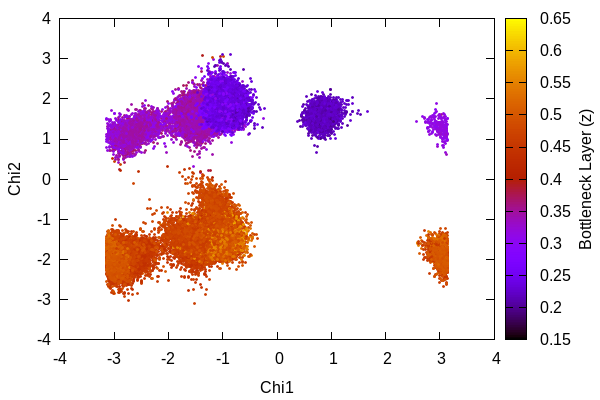

reset
set xlabel 'Chi1'
set ylabel 'Chi2'
set cblabel 'Bottleneck Layer (z)'

set palette model RGB

set output '/tmp/gnuplot-inline-1611844847.167591.817903513618.png'
p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/COLVAR-VDE' every 10 u 2:3:8 notitle with points pt 7 palette ps 0.3








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [54]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Chi1'
set ylabel 'Chi2'
set cblabel 'Bottleneck Layer (z)'

set palette model RGB

p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/COLVAR-VDE' every 10 u 2:3:8 notitle with points pt 7 palette ps 0.3

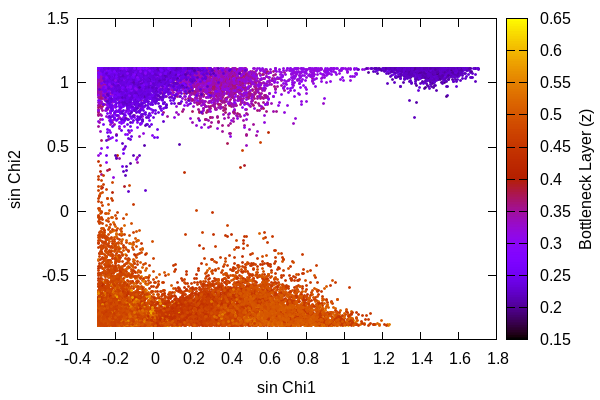

reset
set xlabel 'sin Chi1'
set ylabel 'sin Chi2'
set cblabel 'Bottleneck Layer (z)'

set palette model RGB

set output '/tmp/gnuplot-inline-1611842098.5029109.364305360815.png'
p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/COLVAR-VDE' every 10 u 4:6:8 notitle with points pt 7 palette ps 0.3








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [28]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'sin Chi1'
set ylabel 'sin Chi2'
set cblabel 'Bottleneck Layer (z)'

set palette model RGB

p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/COLVAR-VDE' every 10 u 4:6:8 notitle with points pt 7 palette ps 0.3

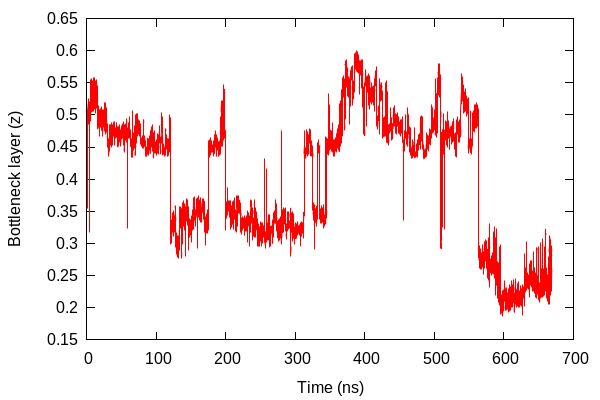

reset
set xlabel 'Time (ns)'
set ylabel 'Bottleneck layer (z)'

set output '/tmp/gnuplot-inline-1611845155.9383337.777149905449.png'
p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/COLVAR-VDE' every 10 u ($1/1000):8 w l ls 1 lc 1 lt 1 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [55]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Time (ns)'
set ylabel 'Bottleneck layer (z)'

p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/COLVAR-VDE' every 10 u ($1/1000):8 w l ls 1 lc 1 lt 1 notitle

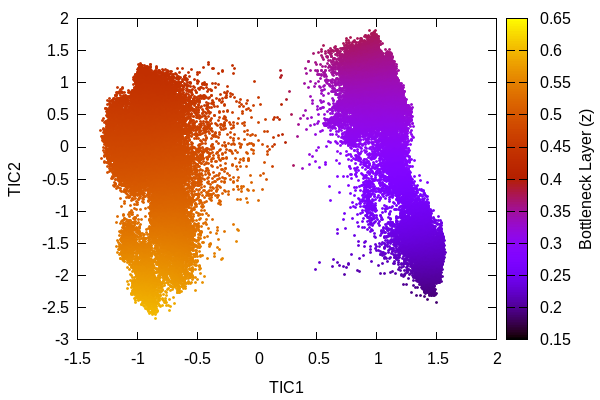

reset
set xlabel 'TIC1'
set ylabel 'TIC2'
set cblabel 'Bottleneck Layer (z)'

set palette model RGB

set output '/tmp/gnuplot-inline-1611912064.6526072.380237095595.png'
p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE-TIC' every 10 u 9:10:4 notitle with points pt 7 palette ps 0.3








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [2]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'TIC1'
set ylabel 'TIC2'
set cblabel 'Bottleneck Layer (z)'

set palette model RGB

p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE-TIC' every 10 u 9:10:4 notitle with points pt 7 palette ps 0.3

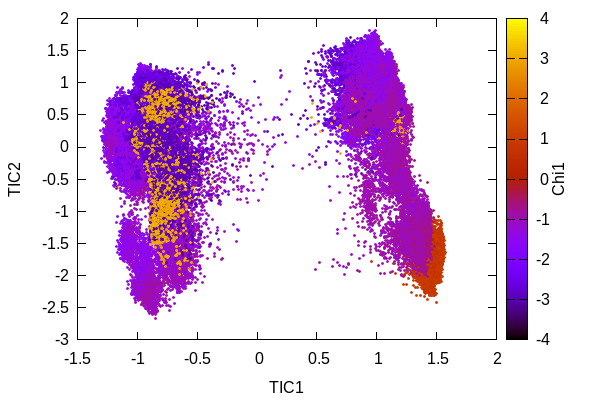

reset
set xlabel 'TIC1'
set ylabel 'TIC2'
set cblabel 'Chi1'

set palette model RGB

set output '/tmp/gnuplot-inline-1612171970.5197206.879597800195.png'
p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE-TIC' every 10 u 9:10:2 notitle with points pt 7 palette ps 0.3








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [1]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'TIC1'
set ylabel 'TIC2'
set cblabel 'Chi1'

set palette model RGB

p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE-TIC' every 10 u 9:10:2 notitle with points pt 7 palette ps 0.3

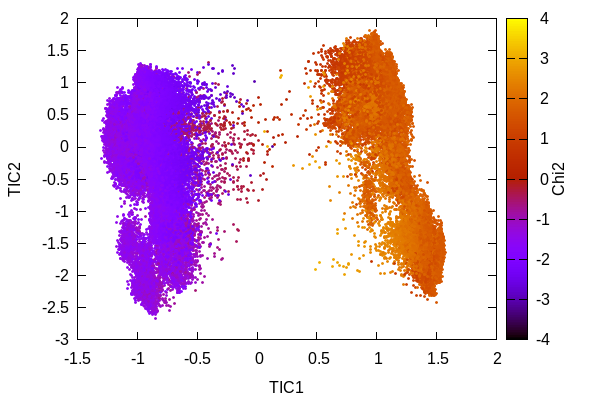

reset
set xlabel 'TIC1'
set ylabel 'TIC2'
set cblabel 'Chi2'

set palette model RGB

set output '/tmp/gnuplot-inline-1612171999.5843003.296288445500.png'
p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE-TIC' every 10 u 9:10:3 notitle with points pt 7 palette ps 0.3








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [2]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'TIC1'
set ylabel 'TIC2'
set cblabel 'Chi2'

set palette model RGB

p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE-TIC' every 10 u 9:10:3 notitle with points pt 7 palette ps 0.3

## Plotting layers

### Layer 1

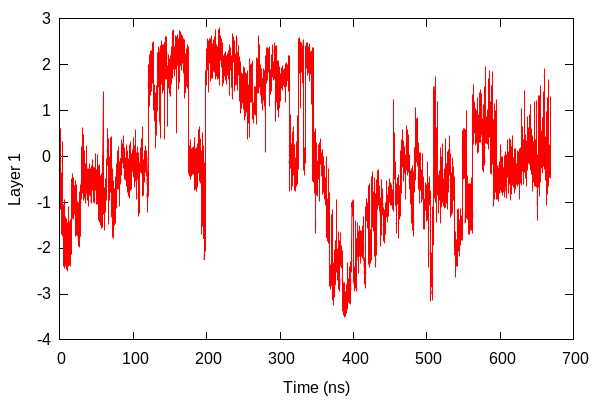

reset
set xlabel 'Time (ns)'
set ylabel 'Layer 1'

set output '/tmp/gnuplot-inline-1611845161.563383.583332308114.png'
p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE' every 10 u ($1/1000):5 w l ls 1 lc 1 lt 1 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [56]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Time (ns)'
set ylabel 'Layer 1'

p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE' every 10 u ($1/1000):5 w l ls 1 lc 1 lt 1 notitle

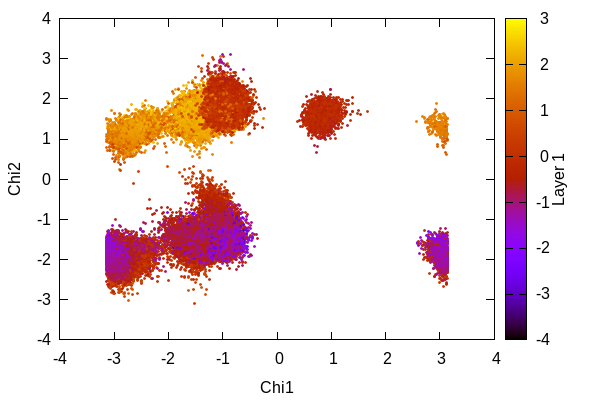

reset
set xlabel 'Chi1'
set ylabel 'Chi2'
set cblabel 'Layer 1'

set palette model RGB

set output '/tmp/gnuplot-inline-1611845883.0358589.631804466551.png'
p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE' every 10 u 2:3:5 notitle with points pt 7 palette ps 0.3








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [63]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Chi1'
set ylabel 'Chi2'
set cblabel 'Layer 1'

set palette model RGB

p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE' every 10 u 2:3:5 notitle with points pt 7 palette ps 0.3

### Layer 2

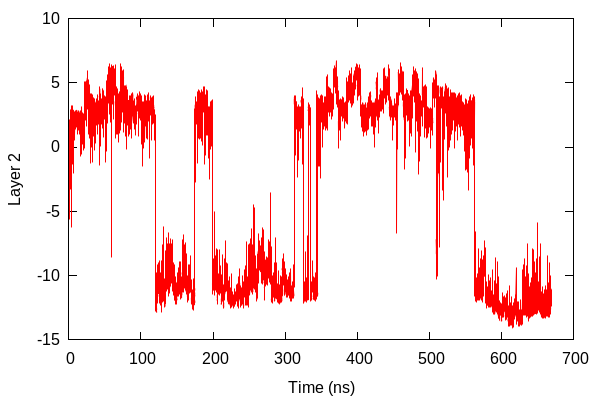

reset
set xlabel 'Time (ns)'
set ylabel 'Layer 2'

set output '/tmp/gnuplot-inline-1611845165.8054602.216384332561.png'
p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE' every 10 u ($1/1000):6 w l ls 1 lc 1 lt 1 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [57]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Time (ns)'
set ylabel 'Layer 2'

p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE' every 10 u ($1/1000):6 w l ls 1 lc 1 lt 1 notitle

### Layer 3

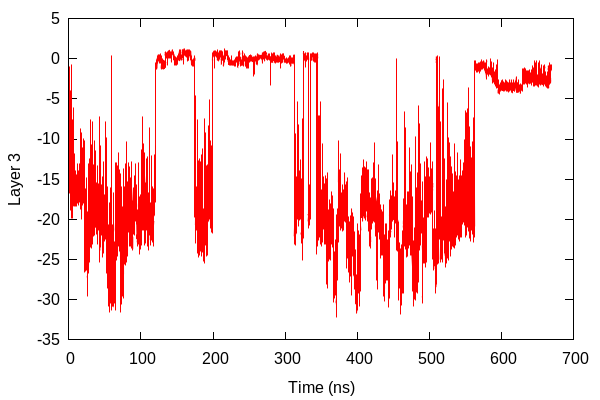

reset
set xlabel 'Time (ns)'
set ylabel 'Layer 3'

set output '/tmp/gnuplot-inline-1611845172.6187496.623259115490.png'
p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE' every 10 u ($1/1000):7 w l ls 1 lc 1 lt 1 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [58]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Time (ns)'
set ylabel 'Layer 3'

p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE' every 10 u ($1/1000):7 w l ls 1 lc 1 lt 1 notitle

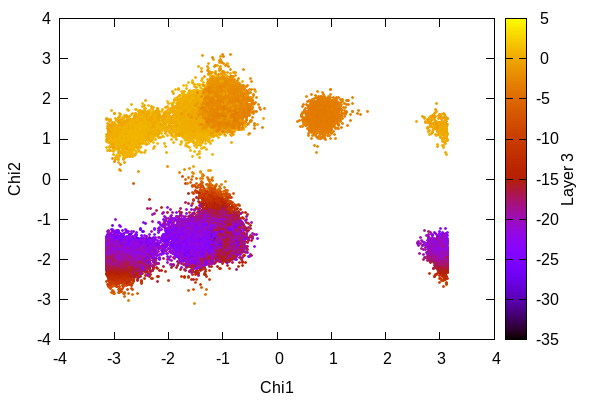

reset
set xlabel 'Chi1'
set ylabel 'Chi2'
set cblabel 'Layer 3'

set palette model RGB

set output '/tmp/gnuplot-inline-1611845810.118839.529919569925.png'
p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE' every 10 u 2:3:7 notitle with points pt 7 palette ps 0.3








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [61]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Chi1'
set ylabel 'Chi2'
set cblabel 'Layer 3'

set palette model RGB

p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE' every 10 u 2:3:7 notitle with points pt 7 palette ps 0.3

### Layer 4

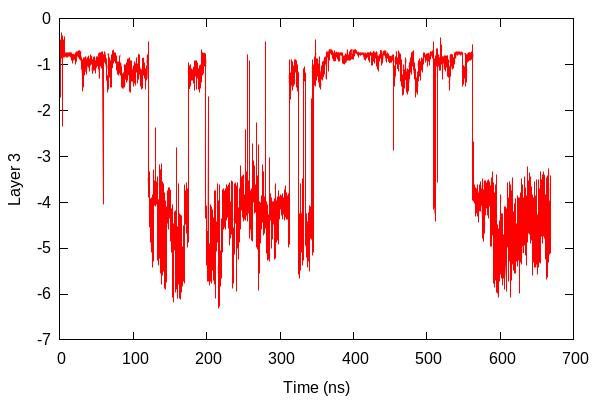

reset
set xlabel 'Time (ns)'
set ylabel 'Layer 3'

set output '/tmp/gnuplot-inline-1611845175.5722802.201160687304.png'
p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE' every 10 u ($1/1000):8 w l ls 1 lc 1 lt 1 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [59]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Time (ns)'
set ylabel 'Layer 3'

p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE' every 10 u ($1/1000):8 w l ls 1 lc 1 lt 1 notitle

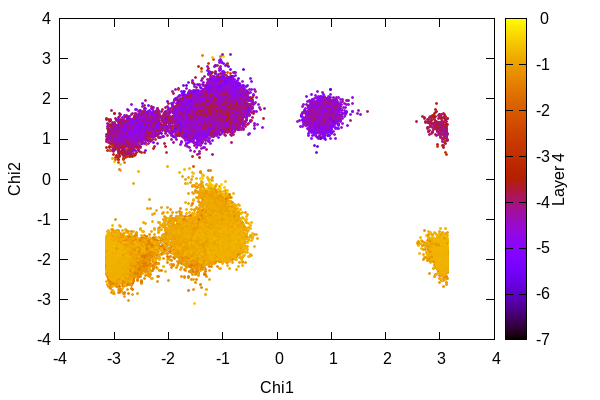

reset
set xlabel 'Chi1'
set ylabel 'Chi2'
set cblabel 'Layer 4'

set palette model RGB

set output '/tmp/gnuplot-inline-1611845849.8068528.741305507168.png'
p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE' every 10 u 2:3:8 notitle with points pt 7 palette ps 0.3








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [62]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Chi1'
set ylabel 'Chi2'
set cblabel 'Layer 4'

set palette model RGB

p '/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/Driver-h2lag10/Information-flow/COLVAR-VDE' every 10 u 2:3:8 notitle with points pt 7 palette ps 0.3

### Hidden layer 3

In [25]:
model = torch.load("/home/sbhakat/Plm-TICA-TIP4P-MD/Res-75-85/2TICS/trained_chilag10h3.pkl")

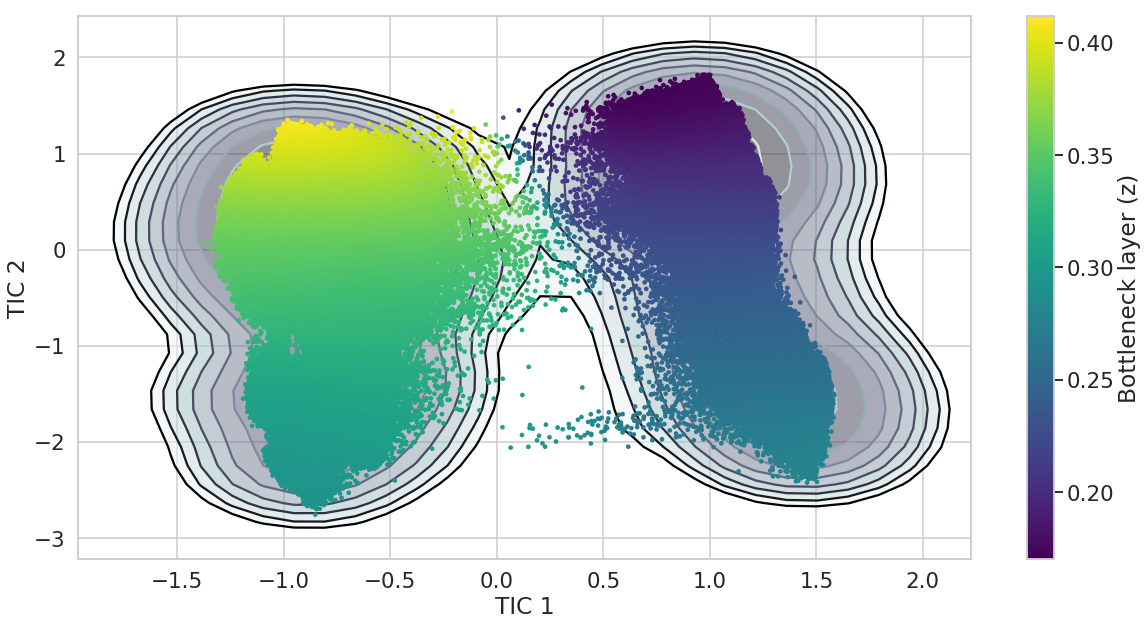

In [15]:
plt.rcParams["figure.figsize"] = (20,10)
model.eval()
X=Variable(torch.from_numpy(txx[:,:model.input_size]).type(model.dtype))
output = model.encoder.output_layer(model.encoder.hidden_network(model.encoder.input_layer(X))).cpu().data.numpy()
msme.plot_free_energy(txx, obs=(0, 1), n_samples=10000)
p=scatter(txx[:,0],txx[:,1],c=np.squeeze(output),cmap='viridis', s=10)
xlabel("TIC 1")
ylabel("TIC 2")
cb=colorbar(p,orientation="vertical")
cb.set_label("Bottleneck layer (z)")

In [26]:
all_output = []
all_out=[]
all_out.append("RESTART\n")
# Lets only calculate the contacts that are actually needed by the tica calculation/neural network 
inds = np.unique(np.nonzero(tica_mdl.components_[:2, :])[1])
all_out.extend(render_df(df=df, inds=inds, tica_mdl=tica_mdl))
# We only need the first 5 tics
for i in range(2):
    all_out.extend(render_tic(tica_mdl=tica_mdl, tic_index=i, output_label_prefix="l0"))
# Convert the VDE model into something Plumed can understand
all_out.extend(render_network(model))

2
Linear(in_features=20, out_features=20, bias=True) 3
3
Swish(
  (sigmoid): Sigmoid()
) 4
4
Linear(in_features=20, out_features=20, bias=True) 5
5
Swish(
  (sigmoid): Sigmoid()
) 6
6
Linear(in_features=20, out_features=20, bias=True) 7
7
Swish(
  (sigmoid): Sigmoid()
) 8


In [27]:
print("".join(all_out))

RESTART
TORSION ATOMS=1,3,5,7 LABEL=chi1_74 

TORSION ATOMS=17,19,21,24 LABEL=chi1_75 

TORSION ATOMS=32,34,36,39 LABEL=chi1_76 

TORSION ATOMS=49,51,53,56 LABEL=chi1_77 

TORSION ATOMS=63,65,67,70 LABEL=chi1_78 

TORSION ATOMS=84,86,88,90 LABEL=chi1_79 

TORSION ATOMS=100,102,104,107 LABEL=chi1_80 

TORSION ATOMS=118,120,122,128 LABEL=chi1_82 

TORSION ATOMS=132,134,136,138 LABEL=chi1_83 

TORSION ATOMS=148,150,152,155 LABEL=chi1_84 

TORSION ATOMS=19,21,24,27 LABEL=chi2_75 

TORSION ATOMS=34,36,39,42 LABEL=chi2_76 

TORSION ATOMS=51,53,56,57 LABEL=chi2_77 

TORSION ATOMS=65,67,70,71 LABEL=chi2_78 

MATHEVAL ARG=chi1_74 FUNC=sin(x)-0.64740203932 LABEL=f0_0 PERIODIC=NO 

MATHEVAL ARG=chi1_75 FUNC=sin(x)-0.285929107851 LABEL=f0_1 PERIODIC=NO 

MATHEVAL ARG=chi1_76 FUNC=sin(x)--0.103304382183 LABEL=f0_2 PERIODIC=NO 

MATHEVAL ARG=chi1_77 FUNC=sin(x)--0.425725706096 LABEL=f0_3 PERIODIC=NO 

MATHEVAL ARG=chi1_78 FUNC=sin(x)--0.708575812944 LABEL=f0_4 PERIODIC=NO 

MATHEVAL ARG=chi1_79 FUNC

In [5]:
cplr = array([ -0.07870694664388665,0.000963284207391124,-0.003383760913656855,0.004126226934776709,0.0003251521573266156,-0.002876113955114574,0.003639612104286331,0.001380431312975332,-0.008000383073645175,0.0005099700502368477,-0.005103059010148361,-0.0034550183177834725,0.08708039573501192,0.003982529366555648,0.2545777645616927,0.0008666602415966988,0.0034201805690963613,-0.0055050929292825975,-0.12779271565372421,1.2310884346038228e-05])

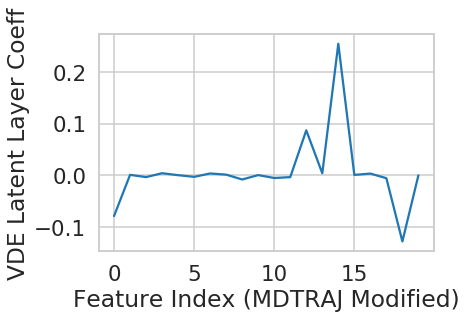

In [10]:
#sns.scatterplot(cplr)
plt.plot(cplr)
xlabel("Feature Index (MDTRAJ Modified)")
ylabel(r'VDE Latent Layer Coeff')
plt.show()